In [1]:
import random
from mpl_toolkits import mplot3d
import copy 
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt

In [2]:
list1 = [];
vector1 = [];
list2 = [];
vector2 = [];
def generateDataSet():
    for n in range(3000):
        if(n % 3 == 0):
            vector1.append(random.randrange(1,1000,3));
        elif(n % 3 == 1):
            vector1.append(random.randrange(3,1000,3));
        elif(n % 3 == 2):
            vector1.append(random.randrange(6,1000,3));
            vector1.append(0);
            list1.append(vector1[:]);
            vector1.clear();
    for n in range(3000):
        if(n % 3 == 0):
            vector2.append(random.randrange(1000,2000,3));
        elif(n % 3 == 1):
            vector2.append(random.randrange(1000,2000,3));
        elif(n % 3 == 2):
            vector2.append(random.randrange(1000,2000,3));
            vector2.append(1);
            list2.append(vector2[:]);
            vector2.clear();

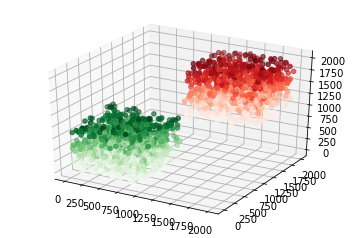

In [3]:
def plotClusters(list1,list2):
    X1 = [];
    Y1 = [];
    Z1 = [];
    X2 = [];
    Y2 = [];
    Z2 = [];
    for n in list1:
        X1.append(n[0]);
        Y1.append(n[1]);
        Z1.append(n[2]);
    for n in list2:
        X2.append(n[0]);
        Y2.append(n[1]);
        Z2.append(n[2]);
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(X1,Y1,Z1, c=Z1, cmap='Greens');
    ax.scatter3D(X2,Y2,Z2,c=Z2,cmap='Reds');
    

generateDataSet();
plotClusters(list1,list2);               

In [4]:
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * float(row[i])
	return 1.0 if activation >= 0.0 else 0.0

In [5]:
def train_weights(train, l_rate, n_epoch):
	weights = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0.0
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			sum_error += error**2
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return weights

In [6]:
# test predictions
dataset = list1+list2
weights = [-0.1, 0.20653640140000007, -0.23418117710000003,0.23418117710000003]
l_rate = 0.1
n_epoch = 5
weights = train_weights(dataset, l_rate, n_epoch)
print(weights)

>epoch=0, lrate=0.100, error=2.000
>epoch=1, lrate=0.100, error=3.000
>epoch=2, lrate=0.100, error=5.000
>epoch=3, lrate=0.100, error=4.000
>epoch=4, lrate=0.100, error=4.000
[-0.6, 112.19999999999987, 66.59999999999994, -55.500000000000014]
